In [6]:
from enum import Enum

class Piece(Enum):
    EMPTY = 'EMPTY'
    BLACK = 'BLACK'
    WHITE = 'WHITE'
    RED = ' RED '

In [ ]:
def state2array(state):

    num_state = []
    for s in state:
        if s == Piece.WHITE:
            num_state.append(1)
        elif s == Piece.BLACK:
            num_state.append(-1)
        else:
            num_state.append(0)
    num_state = np.array([num_state])
    return num_state

In [52]:
def piece_to_num(piece):
    if piece == Piece.WHITE:
        return 1
    elif piece == Piece.BLACK:
        return -1
    else:
        return 0

def state2array(state):
    state_as_array = []
    for i in range(3):
        for j in range(3):
            for k in range(3):
                state_as_array.append(piece_to_num(state[i][j][k]))
    return state_as_array

In [53]:
b = [[[Piece.EMPTY for k in range(3)] for j in range(3)] for i in range(3)]

b_array = state2array(b)

In [ ]:
b = [[[Piece.EMPTY for k in range(3)] for j in range(3)] for i in range(3)]
b_new = [[[Piece.EMPTY for k in b[0]] for j in range(3)] for i in range(3)]

b[b == Piece.EMPTY] = 0

In [ ]:
b

[0,
 [[<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>]],
 [[<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>]]]

In [ ]:
state2array(b)

array([[0, 0, 0]])

In [ ]:
import numpy as np

In [107]:
import copy

In [ ]:
np.array(b).replace(Piece.EMPTY, 0)

AttributeError: ignored

In [145]:
import random
import copy
import csv
import os
from pathlib import Path
from tabulate import tabulate
from abc import abstractmethod
import keras.layers as Kl
import keras.models as Km
import numpy as np
import matplotlib.pyplot as plt


class TicTacToe():

    def __init__(self, player1, player2, exp1=1, exp2=1):
        self.state = [[[Piece.EMPTY for k in range(3)] for j in range(3)] for i in range(3)]
        self.winningRuns = self.getWinningRuns()
        player1 = globals()[player1]
        self.player1 = player1(tag=Piece.WHITE, exploration_factor=exp1)
        player2 = globals()[player2]
        self.player2 = player2(tag=Piece.BLACK, exploration_factor=exp2)

        self.winner = None
        self.turn = 'X'
        self.player_turn = self.player1

        self.White_win_count = 0
        self.Black_win_count = 0
        self.Tcount = 0
        self.all_count = 0
    def getWinningRuns(self):
            runs = []

            runs.append([(0,0,0),(0,0,1),(0,0,2)])
            runs.append([(0,0,0),(0,1,0),(0,2,0)])
            runs.append([(0,0,0),(1,0,0),(2,0,0)])

            runs.append([(2,2,0),(1,2,0),(0,2,0)])
            runs.append([(2,2,0),(2,1,0),(2,0,0)])
            runs.append([(2,2,0),(2,2,1),(2,2,2)])

            runs.append([(0,2,2),(0,1,2),(0,0,2)])
            runs.append([(0,2,2),(1,2,2),(2,2,2)])
            runs.append([(0,2,2),(0,2,1),(0,2,0)])

            runs.append([(2,0,2),(2,0,1),(2,0,0)])
            runs.append([(2,0,2),(1,0,2),(0,0,2)])
            runs.append([(2,0,2),(2,1,2),(2,2,2)])
            # Front
            runs.append([(0,0,0),(1,0,1),(2,0,2)])
            runs.append([(0,0,2),(1,0,1),(2,0,0)])
            runs.append([(1,0,0),(1,0,1),(1,0,2)])
            runs.append([(0,0,1),(1,0,1),(2,0,1)])
            # Top
            runs.append([(0,0,0),(1,1,0),(2,2,0)])
            runs.append([(0,2,0),(1,1,0),(2,0,0)])
            runs.append([(0,1,0),(1,1,0),(2,1,0)])
            runs.append([(1,2,0),(1,1,0),(1,0,0)])
            # Left
            runs.append([(0,0,0),(0,1,1),(0,2,2)])
            runs.append([(0,0,2),(0,1,1),(0,2,0)])
            runs.append([(0,0,1),(0,1,1),(0,2,1)])
            runs.append([(0,1,0),(0,1,1),(0,1,2)])
            # Back
            runs.append([(0,2,2),(1,2,1),(2,2,0)])
            runs.append([(0,2,0),(1,2,1),(2,2,2)])
            runs.append([(1,2,0),(1,2,1),(1,2,2)])
            runs.append([(0,2,1),(1,2,1),(2,2,1)])
            # Right
            runs.append([(2,0,2),(2,1,1),(2,2,0)])
            runs.append([(2,0,0),(2,1,1),(2,2,2)])
            runs.append([(2,0,1),(2,1,1),(2,2,1)])
            runs.append([(2,1,0),(2,1,1),(2,1,2)])
            # Bottom
            runs.append([(2,0,2),(1,1,2),(0,2,2)])
            runs.append([(0,0,2),(1,1,2),(2,2,2)])
            runs.append([(0,1,2),(1,1,2),(2,1,2)])
            runs.append([(1,0,2),(1,1,2),(1,2,2)])
            # Corners
            runs.append([(0,0,0),(1,1,1),(2,2,2)])
            runs.append([(2,0,0),(1,1,1),(0,2,2)])
            runs.append([(2,2,0),(1,1,1),(0,0,2)])
            runs.append([(0,2,0),(1,1,1),(2,0,2)])
            # Edges
            runs.append([(1,0,0),(1,1,1),(1,2,2)])
            runs.append([(2,1,0),(1,1,1),(0,1,2)])
            runs.append([(1,2,0),(1,1,1),(1,0,2)])
            runs.append([(0,1,0),(1,1,1),(2,1,2)])
            runs.append([(0,0,1),(1,1,1),(2,2,1)])
            runs.append([(2,0,1),(1,1,1),(0,2,1)])
            # Middles
            runs.append([(1,1,0),(1,1,1),(1,1,2)])
            runs.append([(1,0,1),(1,1,1),(1,2,1)])
            runs.append([(0,1,1),(1,1,1),(2,1,1)])

            return runs

    def play_game(self):
        while self.winner is None:
            if type(self.player_turn) == Player:
                print(self.turn)
                self.print_game()

            self.state = self.play_move()
            self.game_winner()

            if self.winner is not None:
                break

        self.print_game()

    def play_to_learn(self, episodes):

        for i in range(episodes):
            print('Episode number: ' + str(i))
            
            while self.winner is None:
                print(self.winner)
                self.state = self.play_move(learn=True)
                self.game_winner()
                print("winner?")
                print(self.winner)
                if self.winner is not None:
                    break

                
                self.state = self.play_move(learn=True)
                self.game_winner()
                print("winner?")
                print(self.winner)
                if self.winner is not None:
                    break
            # update last state
            self.state = self.play_move(learn=True)
            self.state = self.play_move(learn=True)
            # update winning state
            self.state = self.play_move(learn=True)
            self.state = self.play_move(learn=True)

            if i% 500 == 0:
                self.print_bar_graph()
                print('-------------------')
                self.player1.print_value = True
            else:
                self.player1.print_value = False

            if i % 2000 == 0:
                self.White_win_count = 0
                self.Black_win_count = 0
                self.Tcount = 0

            self.all_count = i
            self.init_game()

        self.print_summary()
        self.player1.save_values()
        self.player2.save_values()

    def play_move(self, learn=False):
        print("play move")
        if self.turn == 'X':
            if learn is True:
                new_state = self.player1.make_move_and_learn(self.state, self.winner)
            else:
                new_state = self.player1.make_move(self.state, self.winner)
            self.turn = 'O'
            self.player_turn = self.player2
            # self.state=new_state
        else:
            if learn is True:
                new_state = self.player2.make_move_and_learn(self.state, self.winner)
            else:
                new_state = self.player2.make_move(self.state, self.winner)
            self.turn = 'X'
            self.player_turn = self.player1
            # self.state=new_state
        print(new_state)
        return new_state

#     def print_game(self):

#         s = list(self.state)

#         print('    {} | {} | {}'.format(s[0], s[1], s[2]))
#         print('  --------------')
#         print('    {} | {} | {}'.format(s[3], s[4], s[5]))
#         print('  --------------')
#         print('    {} | {} | {}'.format(s[6], s[7], s[8]))
#         print('  --------------')
#         print('  --------------')
        
    def print_game(self):
        gamestate = "+----------------------\n"
        gamestate += "| \ " + self.state[0][2][0].value + "  " + self.state[1][2][0].value + "  " + self.state[2][2][0].value + " \\\n"
        gamestate += "|   \                     \\\n"
        gamestate += "|     \ " + self.state[0][1][0].value + "  " + self.state[1][1][0].value + "  " + self.state[2][1][0].value + " \\\n"
        gamestate += "|       \                     \\\n"
        gamestate += "|         \ " + self.state[0][0][0].value + "  " + self.state[1][0][0].value + "  " + self.state[2][0][0].value + " \\\n"
        gamestate += "|          ---------------------|\n"
        gamestate += "|   " + self.state[0][2][1].value + " |" + self.state[1][2][1].value + "  " + self.state[2][2][1].value + "         |\n"
        gamestate += "|         |                     |\n"
        gamestate += "|       " + self.state[0][1][1].value + "  " + self.state[1][1][1].value + "  " + self.state[2][1][1].value + "     |\n"
        gamestate += "|         |                     |\n"
        gamestate += "|         | " + self.state[0][0][1].value + "  " + self.state[1][0][1].value + "  " + self.state[2][0][1].value + " |\n"
        gamestate += "|         |                     |\n"
        gamestate += " \ " + self.state[0][2][2].value + "  " + self.state[1][2][2].value + "  " + self.state[2][2][2].value + "          |\n"
        gamestate += "   \      |                     |\n"
        gamestate += "     \ " + self.state[0][1][2].value + "  " + self.state[1][1][2].value + "  " + self.state[2][1][2].value + "      |\n"
        gamestate += "       \  |                     |\n"
        gamestate += "         \| " + self.state[0][0][2].value + "  " + self.state[1][0][2].value + "  " + self.state[2][0][2].value + " |\n"
        gamestate += "           ---------------------+\n\n"
        print(gamestate)

#     def game_winner(self):

#         winner = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]
#         for line in winner:
#             s = self.state[line[0]] + self.state[line[1]] + self.state[line[2]]
#             if s == 'XXX':
#                 self.winner = 'X'
#                 break
#             elif s == 'OOO':
#                 self.winner = 'O'
#                 break
#             elif not any(s.isnumeric() for s in list(self.state)):
#                 self.winner = 'No winner'
#         self.check_winner()
#         return self.winner

    
    def game_winner(self):
        print("winning state")
        print(self.state)
        for run in self.winningRuns:
            if all((self.state[x][y][z] == Piece.WHITE) for (x,y,z) in run):
                print("white won")
                self.winner = Piece.WHITE
                return self.winner
            elif all((self.state[x][y][z] == Piece.BLACK) for (x,y,z) in run):
                print("black won")
                self.winner = Piece.BLACK
                return self.winner
            elif Piece.EMPTY not in np.array(self.state):
                self.winner= 'No winner'
        self.check_winner()
        return self.winner

    def check_winner(self):

        if self.winner == Piece.WHITE:
            self.White_win_count += 1
            # print('The winner is X')
            # print('')
            # self.print_game()

        elif self.winner == Piece.BLACK:
            self.Black_win_count += 1
            # print('The winner is O')
            # print('')
            # self.print_game()

        elif self.winner == 'No winner':
            self.Tcount += 1
            # print('No winner')
            # print('')
            # self.print_game()

    def init_game(self):
        self.state = [[[Piece.EMPTY for k in range(3)] for j in range(3)] for i in range(3)]
        self.winner = None
        self.turn = Piece.WHITE
        self.player_turn = self.player1

    def print_bar_graph(self):

        plt.close()
        fig = plt.figure()
        ax1 = fig.add_subplot(2, 1, 1)
        ax2 = fig.add_subplot(2, 1, 2)

        x = ['White', 'Tie', 'Black', 'Sum']
        a = self.White_win_count
        b = self.Tcount
        c = self.Black_win_count
        d = self.all_count

        aprec = 100*a / (a + b + c + 1)
        bprec = 100*b / (a + b + c + 1)
        cprec = 100*c / (a + b + c + 1)

        ax1.clear()
        ax2.clear()
        bar1 = ax1.bar(x, [a, b, c, d])
        bar1[0].set_color('r')
        bar1[1].set_color('b')
        ax1.set_ylim((0, d + 100))
        plt.draw()

        bar2 = ax2.bar(x[0:3], [aprec, bprec, cprec])
        bar2[0].set_color('r')
        bar2[1].set_color('b')
        ax2.set_ylim((0, 100))

        for rect in bar2:
            height = rect.get_height()
            ax2.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
                    '%d' % int(height),
                    ha='center', va='bottom')

        plt.draw()

        plt.pause(0.05)

    def print_summary(self):
        a = ['White',   self.White_win_count, 100 * self.White_win_count / (self.White_win_count + self.Black_win_count + self.Tcount)]
        b = ['Black',   self.Black_win_count, 100 * self.Black_win_count / (self.White_win_count + self.Black_win_count + self.Tcount)]
        c = ['Tie', self.Tcount, 100 * self.Tcount / (self.White_win_count + self.Black_win_count + self.Tcount)]
        tab = tabulate([a, b, c], headers=['Player', 'num of wins', 'prec'])
        print(tab)


class Player():

    def __init__(self, tag, exploration_factor=1):
        self.tag = tag
        self.print_value = False
        self.exp_factor = exploration_factor
        
        
    def validMove(self,state,x,y,z,direction):
        if not x in range(3) or not y in range(3) or not z in range(3):
            return False
        if direction == 'UP':
            return (z == 2) and (state[x][y][z] == Piece.EMPTY or state[x][y][z-1] == Piece.EMPTY or state[x][y][z-2] == Piece.EMPTY)
        elif direction == 'DOWN':
            return (z == 0) and (state[x][y][z] == Piece.EMPTY or state[x][y][z+1] == Piece.EMPTY or state[x][y][z+2] == Piece.EMPTY)
        elif direction == 'LEFT':
            return (x == 2) and (state[x][y][z] == Piece.EMPTY or state[x-1][y][z] == Piece.EMPTY or state[x-2][y][z] == Piece.EMPTY)
        elif direction == 'RIGHT':
            return (x == 0) and (state[x][y][z] == Piece.EMPTY or state[x+1][y][z] == Piece.EMPTY or state[x+2][y][z] == Piece.EMPTY)
        elif direction == 'FRONT':
            return (y == 2) and (state[x][y][z] == Piece.EMPTY or state[x][y-1][z] == Piece.EMPTY or state[x][y-2][z] == Piece.EMPTY)
        elif direction == 'BACK':
            return (y == 0) and (state[x][y][z] == Piece.EMPTY or state[x][y+1][z] == Piece.EMPTY or state[x][y+2][z] == Piece.EMPTY)
        else:
            return False
            
    def move(self,state,x,y,z,direction,player: Piece):
          
           print("moving")
           new_state = copy.deepcopy(state)

           if not self.validMove(state,x,y,z,direction):
                raise ValueError
           else:
               if (state[x][y][z] == Piece.EMPTY):
                   new_state[x][y][z] = player
               else:
                   if direction == 'UP':
                       if (state[x][y][z-1] == Piece.EMPTY):
                           new_state[x][y][z-1] = state[x][y][z]
                           new_state[x][y][z] = player
                       else:
                           new_state[x][y][z-2] = state[x][y][z-1]
                           new_state[x][y][z-1] = state[x][y][z]
                           new_state[x][y][z] = player
                   elif direction ==  'DOWN':
                       if (state[x][y][z+1] == Piece.EMPTY):
                           new_state[x][y][z+1] = state[x][y][z]
                           new_state[x][y][z] = player
                       else:
                           new_state[x][y][z+2] = state[x][y][z+1]
                           new_state[x][y][z+1] = state[x][y][z]

                           new_state[x][y][z] = player
                   elif direction == "LEFT":
                       if (state[x-1][y][z] == Piece.EMPTY):
                           new_state[x-1][y][z] = state[x][y][z]
                           new_state[x][y][z] = player
                       else:
                           new_state[x-2][y][z] = state[x-1][y][z]
                           new_state[x-1][y][z] = state[x][y][z]
                           new_state[x][y][z] = player
                   elif direction == 'RIGHT':
                       if (state[x+1][y][z] == Piece.EMPTY):
                           new_state[x+1][y][z] = state[x][y][z]
                           new_state[x][y][z] = player
                       else:
                           new_state[x+2][y][z] = state[x+1][y][z]
                           new_state[x+1][y][z] = state[x][y][z]
                           new_state[x][y][z] = player
                   elif direction == 'FRONT':
                       if (state[x][y-1][z] == Piece.EMPTY):
                           new_state[x][y-1][z] = state[x][y][z]
                           new_state[x][y][z] = player
                       else:
                           new_state[x][y-2][z] = state[x][y-1][z]
                           new_state[x][y-1][z] = state[x][y][z]
                           new_state[x][y][z] = player
                   elif direction == 'BACK':
                       if (state[x][y+1][z] == Piece.EMPTY):
                           new_state[x][y+1][z] = state[x][y][z]
                           new_state[x][y][z] = player
                       else:
                           new_state[x][y+2][z] = state[x][y+1][z]
                           new_state[x][y+1][z] = state[x][y][z]
                           new_state[x][y][z] = player
           return new_state
                  
    def make_move(self, state, winner):
        x = int(input('Choose x: '))
        y = int(input('Choose x: '))
        z = int(input('Choose x: '))
        direction = random.choice(directions)
        
        # should this be modifying self.state or just returning new state?
        s = move(self,x,y,z,direction,self.tag)
        return s


class Agent(Player):

    def __init__(self, tag, exploration_factor=1):
        super().__init__(tag, exploration_factor)
        self.epsilon = 0.1
        self.alpha = 0.5
        self.prev_state = [[[Piece.EMPTY for k in range(3)] for j in range(3)] for i in range(3)]
        self.state = [[[Piece.EMPTY for k in range(3)] for j in range(3)] for i in range(3)]
        self.print_value = False

        if self.tag == Piece.WHITE:
            self.tag = Piece.BLACK
        else:
            self.tag = Piece.WHITE

    @abstractmethod
    def calc_value(self, state):
        pass

    @abstractmethod
    def learn_state(self, state, winner):
        pass

    def getPossibleMoves(self, state):
        moves = []
        for x in range(0,3):
            for y in range(0,3):
                for z in range(0,3):
                    for direction in directions:
                        if self.validMove(state,x,y,z,direction):
                            moves.append((x,y,z,direction))
        return moves
                              
                              
    def make_move(self, state, winner):
        print("make move")
        self.state = state
        print(winner)
        if winner is not None:
            new_state = state
            return new_state

        p = random.uniform(0, 1)
        if p < self.exp_factor:
            new_state = self.make_optimal_move(state)
        else:
            moves = self.getPossibleMoves(state)
            (x,y,z,direction) = random.choice(moves)
            print("random move from possible moves")
            print(str((x,y,z,direction)))
            new_state = self.move(state,x,y,z,direction,self.tag)
        
        print(new_state)
        return new_state

    def make_move_and_learn(self, state, winner):

        self.learn_state(state, winner)

        return self.make_move(state, winner)

#     def make_optimal_move(self, state):
#         moves = getPossibleMoves(state)

#         if len(moves) == 1:
#             x,y,z,direction = moves[0]
#             temp_state = move(self,state,x,y,z,direction,self.tag)
#             new_state = temp_state
#             return new_state

#         temp_state_list = []
#         v = -float('Inf')

#         for x,y,z,direction in moves:

#             v_temp = []
#             temp_state = move(self,state,x,y,z,direction,self.tag)

#             moves_op = [s for s, v in enumerate(temp_state) if v.isnumeric()]
#             for idy in moves_op:
#                 temp_state_op = temp_state[:idy] + self.op_tag + temp_state[idy + 1:]
#                 v_temp.append(self.calc_value(temp_state_op))

#             # delets Nones
#             v_temp = list(filter(None.__ne__, v_temp))

#             if len(v_temp) != 0:
#                 v_temp = np.min(v_temp)
#             else:
#                 # encourage exploration
#                 v_temp = 1

#             if v_temp > v:
#                 temp_state_list = [temp_state]
#                 v = v_temp
#             elif v_temp == v:
#                 temp_state_list.append(temp_state)

#         try:
#             new_state = random.choice(temp_state_list)
#         except ValueError:
#             print('temp state:', temp_state_list)
#             raise Exception('temp state empty')

#         return new_state
                                  
    def make_optimal_move(self, state):
        moves = self.getPossibleMoves(state)

        # if len(moves) == 1:
        #     x,y,z,direction = moves[0]
        #     print("only 1 poss move")
        #     print(str(moves[optimal_move_index]))
        #     temp_state = self.move(state,x,y,z,direction,self.tag)
        #     new_state = temp_state
        #     return new_state

        temp_state_list = []
        v = -float('Inf')

        temp_state_values = []
        for x,y,z,direction in moves:
            print("getting value of all possible moves")
            temp_state = copy.deepcopy(state)
            temp_state = self.move(temp_state,x,y,z,direction,self.tag)
            temp_state_value =self.calc_value(temp_state)
            temp_state_values.append(temp_state_value)
        
        optimal_move_index = np.argmax(temp_state_values)
        x,y,z,direction = moves[optimal_move_index]
        print("decided move")
        print(str(moves[optimal_move_index]))

        new_state = self.move(state,x,y,z,direction,self.tag)
        print(new_state)
        return new_state
                                  
    def reward(self, winner):
        if winner is self.tag:
            R = 1
        elif winner is None:
            R = 0
        elif winner == 'No winner':
            R = 0.5
        else:
            R = -1
        return R


# class QAgent(Agent):

#     def __init__(self, tag, exploration_factor=1):
#         super().__init__(tag, exploration_factor)
#         self.tag = tag
#         self.values = dict()
#         self.load_values()

#     def learn_state(self, state, winner):

#         if self.tag in state:
#             if self.prev_state in self.values.keys():
#                 v_s = self.values[self.prev_state]
#             else:
#                 v_s = int(0)

#             R = self.reward(winner)

#             if self.state in self.values.keys() and winner is None:
#                 v_s_tag = self.values[state]
#             else:
#                 v_s_tag = int(0)

#             self.values[self.prev_state] = v_s + self.alpha*(R + v_s_tag - v_s)

#         self.prev_state = state

#     def calc_value(self, state):
#         if state in self.values.keys():
#             return self.values[state]

#     def load_values(self):
#         s = 'values' + self.tag + '.csv'
#         try:
#             value_csv = csv.reader(open(s, 'r'))
#             for row in value_csv:
#                 k, v = row
#                 self.values[k] = float(v)
#         except:
#             pass
#         # print(self.values)

#     def save_values(self):
#         s = 'values' + self.tag + '.csv'
#         try:
#             os.remove(s)
#         except:
#             pass
#         a = csv.writer(open(s, 'a'))

#         for v, k in self.values.items():
#             a.writerow([v, k])


class DeepAgent(Agent):

    def __init__(self, tag, exploration_factor=1):
        print("initiating an agent")
        super().__init__(tag, exploration_factor)
        self.tag = tag
        self.value_model = self.load_model()

    # def state2array(self, state):
    #     num_state = []
    #     for s in state:
    #         if s == Piece.WHITE:
    #             num_state.append(1)
    #         elif s == Piece.BLACK:
    #             num_state.append(-1)
    #         else:
    #             num_state.append(0)
    #     num_state = np.array([num_state])
    #     return num_state

    def piece_to_num(self, piece):
        if piece == Piece.WHITE:
            return 1
        elif piece == Piece.BLACK:
            return -1
        else:
            return 0

    def state2array(self, state):
        state_as_array = []
        for i in range(3):
            for j in range(3):
                for k in range(3):
                    state_as_array.append(self.piece_to_num(state[i][j][k]))
        return np.array(state_as_array)

    def learn_state(self, state, winner):
        print("learning a state")
        target = self.calc_target(state, winner)

        self.train_model(target, 10)

        self.prev_state = state

    def load_model(self):
        print("loading a model")
        s = 'model_values' + str(self.tag) + '.h5'
        model_file = Path(s)
        if model_file.is_file():
            model = Km.load_model(s)
            print('load model: ' + s)
        else:
            print('new model')
            model = Km.Sequential()
            model.add(Kl.Dense(18, activation='relu', input_dim=27))
            model.add(Kl.Dense(18, activation='relu'))
            model.add(Kl.Dense(1, activation='linear'))
            model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

        model.summary()
        return model

    def calc_value(self, state):
        x_test = self.state2array(state)
        print(x_test)
        x_test = tf.reshape(x_test,shape=(1,27))
        return self.value_model.predict(x_test)

    def calc_target(self, state, winner):
        print("calcing a target")
        if self.tag in state:

            v_s = self.calc_value(self.prev_state)

            R = self.reward(winner)

            if winner is None:
                v_s_tag = self.calc_value(state)
            else:
                v_s_tag = 0

            target = np.array(v_s + self.alpha * (R + v_s_tag - v_s))

            return target
  
    def train_model(self, target, epochs):
        print("training a model")
        X_train = self.state2array(self.prev_state)
        # X_train = np.array(X_train)
        print(X_train)
        X_train = tf.reshape(X_train,shape=(1,27))
        if target is not None:
            self.value_model.fit(X_train, target, epochs=epochs, verbose=0)

    def save_values(self):
        print("saving model values")
        s = 'model_values' + str(self.tag) + '.h5'
        try:
            os.remove(s)
        except:
            pass
        self.value_model.save(s)


# def check_player():
#     # print('QAgent X 1 and QAgent 1 0')
#     # game = TicTacToe('QAgent', 'QAgent', 1, 0)
#     # game.play_to_learn(1000)
#     # print('DeepAgent X 0.8 and DeepAgent 0.8')
#     # game = TicTacToe('DeepAgent', 'DeepAgent', 0.8, 0.8)
#     # game.play_to_learn(30000)
#     print('DeepAgent X 0 and QAgent 1, 0')
#     # game = TicTacToe('Player', 'DeepAgent', 0.8, 0.8)
#     game.play_game()
    


In [43]:
directions = ['UP','DOWN','LEFT','RIGHT','FRONT','BACK']

In [81]:
b

AttributeError: ignored

initiating an agent
loading a model
new model
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_252 (Dense)           (None, 18)                504       
                                                                 
 dense_253 (Dense)           (None, 18)                342       
                                                                 
 dense_254 (Dense)           (None, 1)                 19        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________
initiating an agent
loading a model
new model
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_255 (Dense)           (None, 18)                504       
      

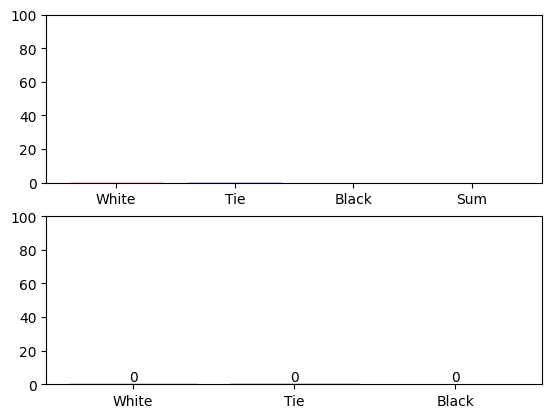

-------------------


ZeroDivisionError: ignored

In [146]:
game = TicTacToe('DeepAgent', 'DeepAgent', 0.8, 0.8)
game.play_to_learn(1)

In [20]:
import tensorflow as tf

In [49]:
b

[[[<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>]],
 [[<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>]],
 [[<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>],
  [<Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>, <Piece.EMPTY: 'EMPTY'>]]]

In [126]:
any(Piece.EMPTY in position for position in sublist for sublist in b)

NameError: ignored

In [128]:
Piece.EMPTY in np.array(b)

True

In [55]:
tf.reshape(b_array,shape=(1,27))

TensorShape([1, 27])